In [79]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## ETL

In [3]:
y = data['Outcome']
X = data.drop('Outcome', axis=1)

Note that this data contains no missing values

In [4]:
X.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

The following columns contain outliers:
Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age 

In [5]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [6]:
X.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object

In [7]:
X.Pregnancies = X.Pregnancies.astype('float64')
X.Glucose = X.Glucose.astype('float64')
X.BloodPressure = X.BloodPressure.astype('float64')
X.SkinThickness = X.SkinThickness.astype('float64')
X.Insulin = X.Insulin.astype('float64')
X.Age = X.Age.astype('float64')
X.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
dtype: object

In [8]:
# remove outliers via z-score
z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_X = X[filtered_entries]
new_X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,3.845930,120.293605,72.345930,20.787791,72.507267,32.209157,0.454555,33.094477
std,3.279256,30.005790,12.312859,15.405391,90.106939,6.618891,0.284527,11.436990
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.245000,24.000000
50%,3.000000,115.000000,72.000000,23.000000,43.500000,32.000000,0.370000,29.000000
75%,6.000000,139.000000,80.000000,32.000000,126.000000,36.300000,0.605500,40.000000
max,13.000000,199.000000,122.000000,60.000000,415.000000,55.000000,1.461000,68.000000


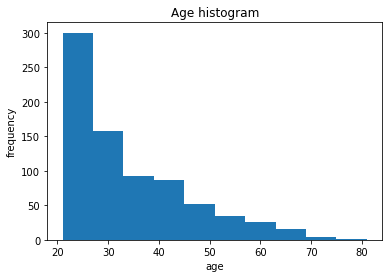

In [82]:
plt.hist(data['Age'],bins=10)
plt.title('Age histogram')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

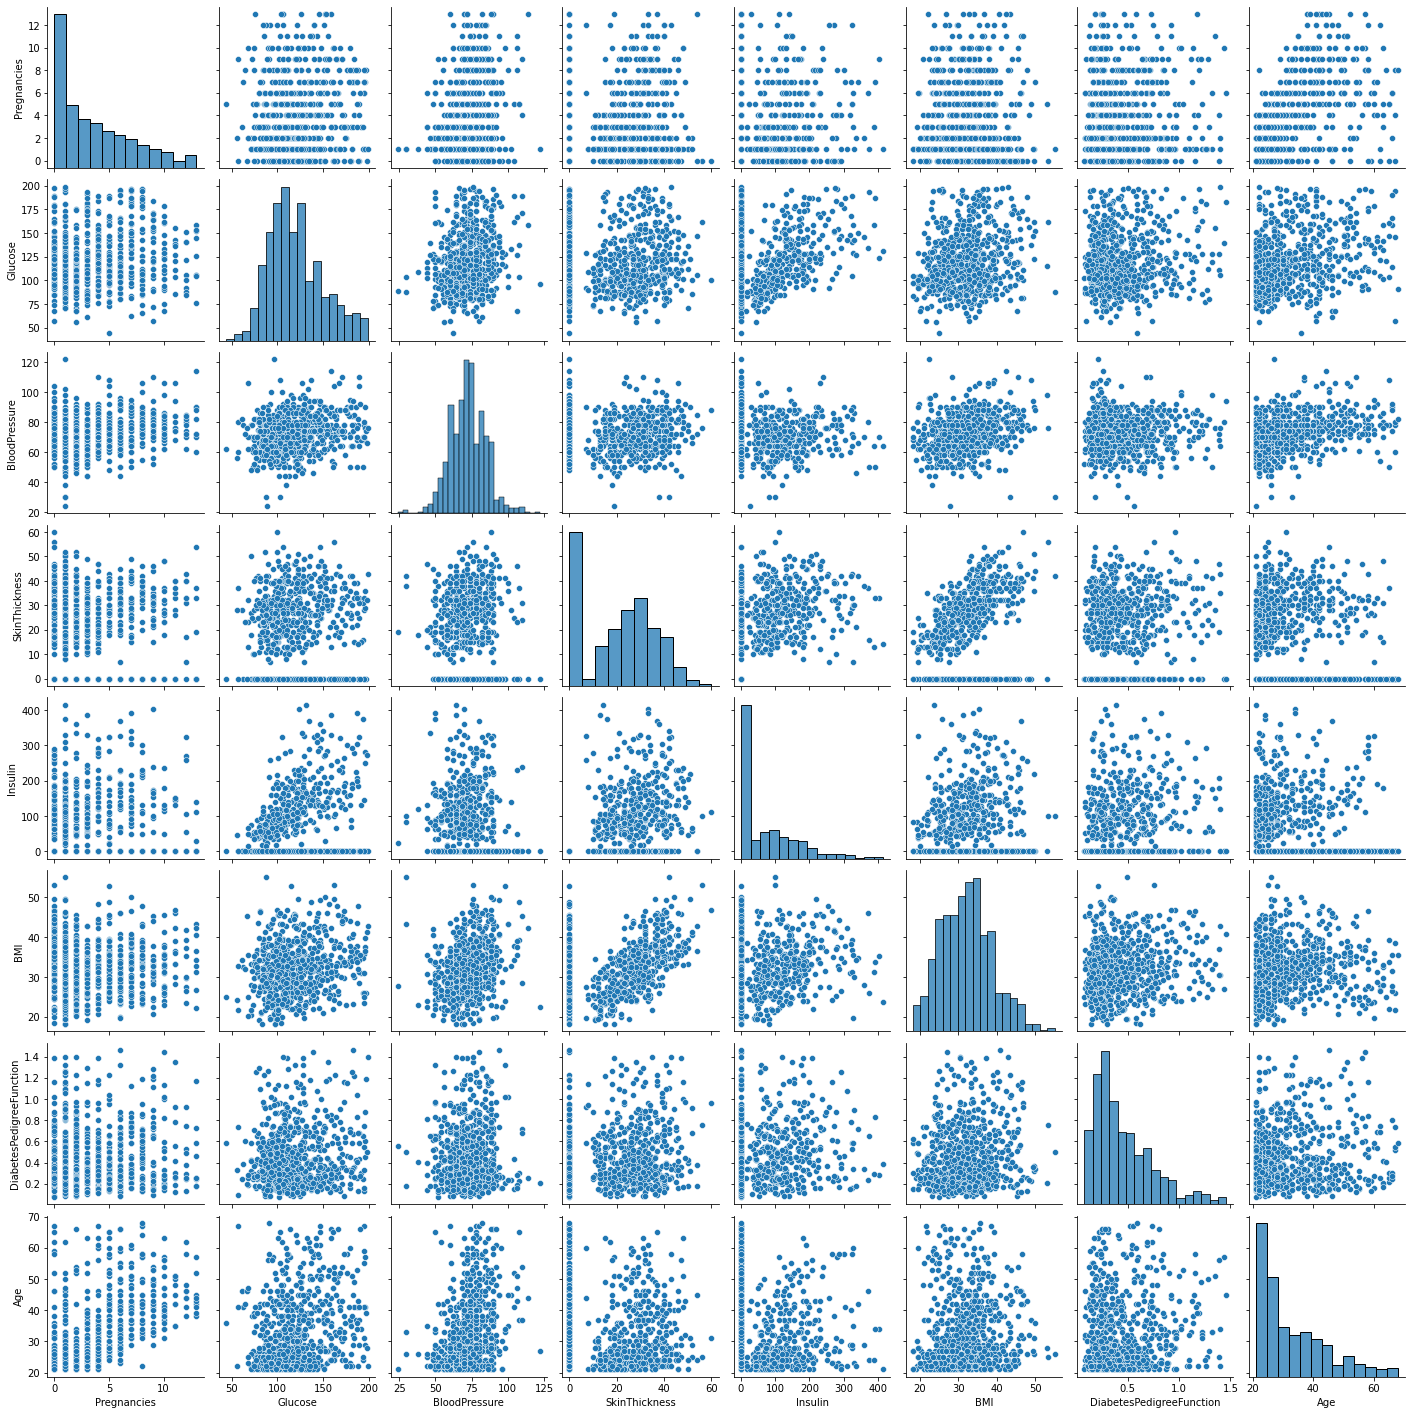

In [9]:
sns.pairplot(new_X)

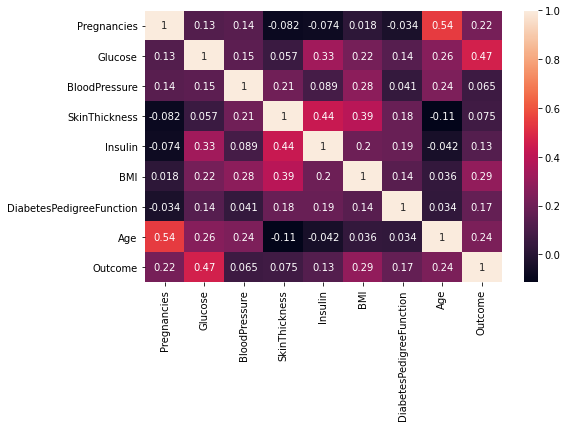

In [81]:
plt.figure(figsize=(8,5))
x = sns.heatmap(data.corr(),annot=True,annot_kws={"size": 10})
x.set_yticklabels(x.get_ymajorticklabels(), fontsize = 10)
x.set_xticklabels(x.get_xmajorticklabels(), fontsize = 10)
plt.show()

Note that none of the features in the dataset are strongly correlated meaning we can assume them to be independent for the sake of creating this model

In [10]:
corr_mat = new_X.corr()
corr_mat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.156470,0.229881,-0.097721,-0.080638,0.043549,0.015522,0.569787
Glucose,0.156470,1.000000,0.240560,0.008577,0.272654,0.196665,0.104521,0.266930
BloodPressure,0.229881,0.240560,1.000000,0.005076,-0.070572,0.274707,0.032757,0.354391
SkinThickness,-0.097721,0.008577,0.005076,1.000000,0.462778,0.383819,0.153530,-0.150039
Insulin,-0.080638,0.272654,-0.070572,0.462778,1.000000,0.165428,0.183184,-0.081003
BMI,0.043549,0.196665,0.274707,0.383819,0.165428,1.000000,0.125714,0.059980
DiabetesPedigreeFunction,0.015522,0.104521,0.032757,0.153530,0.183184,0.125714,1.000000,0.060663
Age,0.569787,0.266930,0.354391,-0.150039,-0.081003,0.059980,0.060663,1.000000


# CODE

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0) 

# Data Normalization

In [13]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Model Building

In [14]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       130
           1       0.67      0.53      0.59        62

    accuracy                           0.77       192
   macro avg       0.74      0.70      0.71       192
weighted avg       0.76      0.77      0.76       192



# Hyperparameter tuning

In [16]:
from sklearn.model_selection import GridSearchCV
params_NB = {'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]}
gs_NB = GridSearchCV(estimator=clf, 
                 param_grid=params_NB, 
                 cv=10,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_

Fitting 10 folds for each of 14 candidates, totalling 140 fits


{'var_smoothing': 0.01}

In [17]:
clf = GaussianNB(var_smoothing=0.01)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       130
           1       0.67      0.53      0.59        62

    accuracy                           0.77       192
   macro avg       0.74      0.70      0.71       192
weighted avg       0.76      0.77      0.76       192



In [19]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Feature engineering
# ----------------------------------------------------------------------

# Oversampling Minority Class

In [20]:
class0 = data[data['Outcome']==0]
class1 =  data[data['Outcome']==1]

In [22]:
class1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [26]:
from sklearn.utils import resample
# upsample minority
class1_upsampled = resample(class1, # minority sample
                          replace=True, # sample with replacement
                          n_samples=len(class0), # match number in majority class
                          random_state=42) # reproducible results

# # combine majority and upsampled minority
upsampled = pd.concat([class0, class1_upsampled])

# check new class counts
upsampled['Outcome'].value_counts()

0    500
1    500
Name: Outcome, dtype: int64

In [30]:
y = upsampled['Outcome']
X = upsampled.drop('Outcome', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0) 

In [32]:
clf = GaussianNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.65      0.79      0.72       121
           1       0.76      0.60      0.67       129

    accuracy                           0.70       250
   macro avg       0.71      0.70      0.69       250
weighted avg       0.71      0.70      0.69       250



In [37]:
from sklearn.model_selection import GridSearchCV
params_NB = {'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]}
gs_NB = GridSearchCV(estimator=clf, 
                 param_grid=params_NB, 
                 cv=10,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_

Fitting 10 folds for each of 14 candidates, totalling 140 fits


{'var_smoothing': 0.0001}

In [39]:
clf = GaussianNB(var_smoothing=0.0001)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.81      0.73       121
           1       0.78      0.62      0.69       129

    accuracy                           0.71       250
   macro avg       0.72      0.72      0.71       250
weighted avg       0.72      0.71      0.71       250



# Undersampling Majority Class

In [42]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [44]:
len(class0)

500

In [45]:
len(class1)

268

In [47]:
from sklearn.utils import resample
# upsample minority
class0_downsampled = resample(class0, # majority sample
                          replace=False, # sample with replacement
                          n_samples=len(class1), # match number in minority class
                          random_state=42) # reproducible results

# # combine majority and upsampled minority
upsampled = pd.concat([class1, class0_downsampled])

# check new class counts
upsampled['Outcome'].value_counts()

1    268
0    268
Name: Outcome, dtype: int64

In [48]:
y = upsampled['Outcome']
X = upsampled.drop('Outcome', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0) 

In [49]:
clf = GaussianNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.79      0.81        71
           1       0.77      0.81      0.79        63

    accuracy                           0.80       134
   macro avg       0.80      0.80      0.80       134
weighted avg       0.80      0.80      0.80       134



In [52]:
from sklearn.model_selection import GridSearchCV
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=clf, 
                 param_grid=params_NB, 
                 cv=10,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'var_smoothing': 0.0001519911082952933}

In [53]:
clf = GaussianNB(var_smoothing=0.0001519911082952933)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        71
           1       0.78      0.81      0.80        63

    accuracy                           0.81       134
   macro avg       0.81      0.81      0.81       134
weighted avg       0.81      0.81      0.81       134



In [57]:
confusion_matrix(y_test,y_pred)

array([[57, 14],
       [12, 51]], dtype=int64)

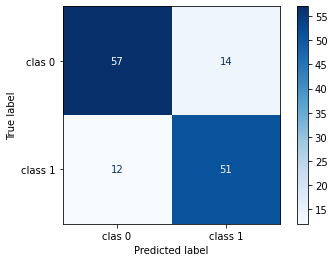

In [80]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['clas 0','class 1'])